In [157]:
import sys
sys.path.append("D:\python\lib\site-packages")
import pyxdf as xdf
import numpy as np
import matplotlib.pyplot as plt
import mne
%matplotlib notebook

### Load your data from the .xdf file

In [87]:
# Load file
yoshe_xdf = "yoshe_test.xdf"
annach_xdf = "annachess_test.xdf"
annag_xdf = "annag_test.xdf"

current_xdf = yoshe_xdf

streams = xdf.load_xdf(current_xdf)

# Extract streams
unitystr_time_series     = streams[0][0]['time_series']
unitystr_time_stamps     = streams[0][0]['time_stamps']
unitystr_first_timestamp = np.float(unitystr_time_stamps[0])#np.float(streams[0][0]['footer']['info']['first_timestamp'][2])

openvibemarkers_time_series     = streams[0][1]['time_series']
openvibemarkers_time_stamps     = streams[0][1]['time_stamps']
openvibemarkers_first_timestamp = np.float(streams[0][1]['footer']['info']['first_timestamp'][0])

eeg_time_series     = streams[0][2]['time_series']
eeg_time_stamps     = streams[0][2]['time_stamps']
eeg_first_timestamp = np.float(streams[0][2]['footer']['info']['first_timestamp'][0])

# Sampling frequency of the recorded eeg data
sfreq = np.float(streams[0][2]['info']['nominal_srate'][0])

In [17]:
xdf.load_xdf(yoshe_xdf)

([{'info': defaultdict(list,
               {'name': ['UnityData Stram'],
                'type': ['LSL_Marker_Strings'],
                'channel_count': ['1'],
                'nominal_srate': ['0'],
                'channel_format': ['string'],
                'source_id': ['D3F83BB699EB49AB94A9FA44B88882AB'],
                'version': ['1.1000000000000001'],
                'created_at': ['2893.0703176000002'],
                'uid': ['8b3d36d2-1312-436a-bc82-29dbee79b6c7'],
                'session_id': ['default'],
                'hostname': ['LAPTOP-JQKQ10DS'],
                'v4address': [None],
                'v4data_port': ['16572'],
                'v4service_port': ['16572'],
                'v6address': [None],
                'v6data_port': ['16572'],
                'v6service_port': ['16572'],
                'desc': [None],
                'effective_srate': 0}),
   'footer': {'info': defaultdict(list,
                {'first_timestamp': ['287.5280456542969'],
    

In [66]:
#Convert labels to codes: 1-chose high, 2-chose low, 3- Reward high, 4-reward low, 5-no reward

for i in range (len(unitystr_time_series)):
    if "PressedHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=1
    elif "PressedLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=2
    elif "RewardHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=3
    elif "RewardLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=4
    elif "RewardNone" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=5
        

In [67]:
print(unitystr_time_series)
len(unitystr_time_series)

[1, 3, 1, 5, 1, 3, 2, 5, 2, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 2, 4, 1, 5, 1, 5, 2, 4, 1, 5, 1, 5, 1, 5, 1, 3, 2, 4, 2, 5, 1, 3, 1, 5, 1, 5, 2, 5, 2, 4, 1, 5, 1, 3, 1, 5, 1, 3, 1, 5, 2, 5, 2, 4, 1, 5, 1, 5, 1, 5, 1, 3, 2, 5, 2, 5, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 3]


100

In [68]:
print(unitystr_time_stamps)
len(unitystr_time_stamps) #[AS comment]as you can see below and directly in the xdf file above unity timestamps end around 687 and eeg itmestamps around 600. I checked a CSV file made using Hector's script and there in . the result of his find_nearest function I guess we lost all markers after 39th trial. Looks like our synchronisation process has some flow=(

[ 78.09822004  82.42500217  85.28958798  90.57762801  92.73358042
  98.35888546 100.03235496 105.74995279 107.57575078 113.24319297
 114.66792896 120.35178197 121.90982637 127.65998645 129.21915237
 134.87071779 136.46092771 142.09483871 143.52098614 149.15344755
 150.57721461 156.21230054 157.83549996 163.28720577 164.9936724
 170.61426248 172.287114   177.92212363 179.73140399 185.28413823
 186.8402295  192.30940662 193.63437302 199.27061861 200.66258635
 206.3142891  208.01997754 213.68761046 215.44398859 221.04599347
 222.73674355 228.41945215 229.89425986 235.57973031 237.38676762
 242.82098685 244.41092211 250.0820493  251.68857087 257.30737567
 259.61010999 265.19446044 266.65240719 272.33731306 273.89459451
 279.4609396  280.91879479 286.53683665 288.59356878 293.91140923
 295.37307912 301.05816809 302.4664017  308.067842   309.42645403
 315.06021244 316.32196168 322.0559093  323.2818309  328.91711519
 330.59103483 336.07574539 337.58358837 343.03683532 344.49566707
 350.179596

100

In [69]:
print(eeg_time_stamps)
len(eeg_time_stamps)
print(eeg_time_stamps[0])

[ 64.49999863  64.50781113  64.51562363 ... 461.53905974 461.54687224
 461.55468474]
64.49999862827323


In [70]:
#Code to cleanup and trim the mismatching unity timestamps

for i in range (len(unitystr_time_stamps)):
    if unitystr_time_stamps[i] < eeg_time_stamps[0]:
        unitystr_time_stamps[i] = 0
        unitystr_time_series[i] = 0
    if unitystr_time_stamps[i] > eeg_time_stamps[-1]:
        unitystr_time_stamps[i] = 0
        unitystr_time_series[i] = 0

C_unitystr_time_stamps = np.trim_zeros(unitystr_time_stamps)
C_unitystr_time_series = np.trim_zeros(unitystr_time_series)

print(C_unitystr_time_stamps)
print(C_unitystr_time_series)

[ 78.09822004  82.42500217  85.28958798  90.57762801  92.73358042
  98.35888546 100.03235496 105.74995279 107.57575078 113.24319297
 114.66792896 120.35178197 121.90982637 127.65998645 129.21915237
 134.87071779 136.46092771 142.09483871 143.52098614 149.15344755
 150.57721461 156.21230054 157.83549996 163.28720577 164.9936724
 170.61426248 172.287114   177.92212363 179.73140399 185.28413823
 186.8402295  192.30940662 193.63437302 199.27061861 200.66258635
 206.3142891  208.01997754 213.68761046 215.44398859 221.04599347
 222.73674355 228.41945215 229.89425986 235.57973031 237.38676762
 242.82098685 244.41092211 250.0820493  251.68857087 257.30737567
 259.61010999 265.19446044 266.65240719 272.33731306 273.89459451
 279.4609396  280.91879479 286.53683665 288.59356878 293.91140923
 295.37307912 301.05816809 302.4664017  308.067842   309.42645403
 315.06021244 316.32196168 322.0559093  323.2818309  328.91711519
 330.59103483 336.07574539 337.58358837 343.03683532 344.49566707
 350.179596

### Create a RAW array object to store the EEG data

In [71]:
# 14 channels: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4

ch_names = ('AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4')

# Create the info file
info = mne.create_info(ch_names, sfreq, ch_types='eeg' )

# Convert first time to sample
first_samp = int(eeg_first_timestamp*sfreq)
print(first_samp)

8256


In [72]:
# NB set the first sample to be able to align the events
raw = mne.io.RawArray(eeg_time_series.T, info, first_samp=first_samp)

# raw.set_eeg_reference()

Creating RawArray with float64 data, n_channels=14, n_times=50824
    Range : 8256 ... 59079 =     64.500 ...   461.555 secs
Ready.


### Set montage

<IPython.core.display.Javascript object>


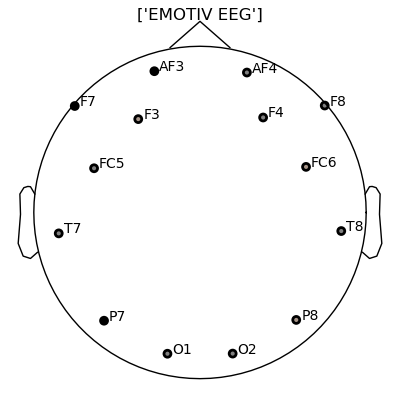

In [73]:
montage = mne.channels.read_montage('standard_1020')

raw.set_montage(montage)
f = raw.plot_sensors(ch_type='eeg', title=['EMOTIV EEG'], show_names=True, ch_groups='position', show=False)
f.set_size_inches(4,4)

<IPython.core.display.Javascript object>


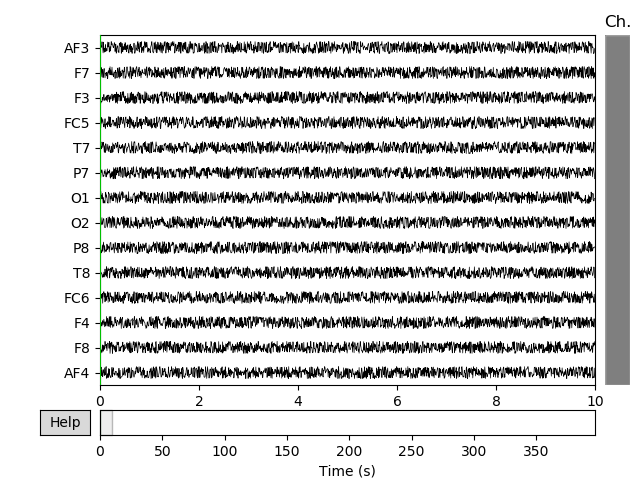

<IPython.core.display.Javascript object>


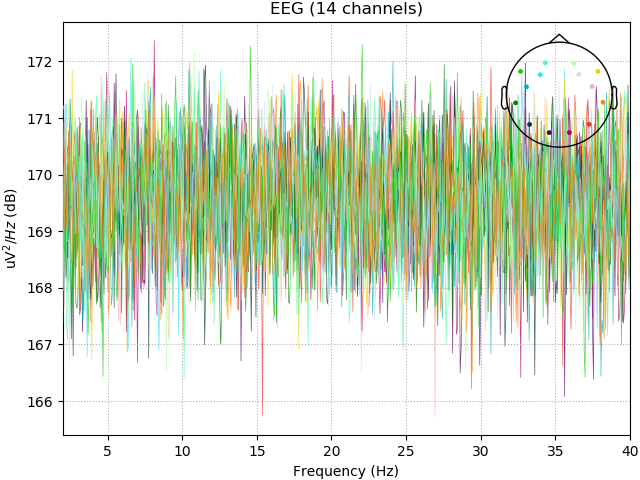

Effective window size : 16.000 (s)


In [74]:
# Plot some data
raw.plot(scalings='auto', n_channels=14, show=False);

raw.plot_psd(fmin=2.0, fmax=40.0, show=False);

### Define the event channel

In [75]:
# Create a ne stimulation channels
info         = mne.create_info(['STI'], raw.info['sfreq'], ch_types=['stim'])
# Fill it with an vector of zeros
stim_data    = np.zeros((1, len(raw.times)))

In [76]:
stim_raw     = mne.io.RawArray(stim_data, info, first_samp=first_samp)

Creating RawArray with float64 data, n_channels=1, n_times=50824
    Range : 8256 ... 59079 =     64.500 ...   461.555 secs
Ready.


In [77]:
# Add the new channel to your dataset
raw.add_channels([stim_raw], force_update_info=False)

<RawArray  |  None, n_channels x n_times : 15 x 50824 (397.1 sec), ~5.9 MB, data loaded>

In [78]:
(C_unitystr_time_stamps*sfreq).astype('int')

array([ 9996, 10550, 10917, 11593, 11869, 12589, 12804, 13535, 13769,
       14495, 14677, 15405, 15604, 16340, 16540, 17263, 17466, 18188,
       18370, 19091, 19273, 19995, 20202, 20900, 21119, 21838, 22052,
       22774, 23005, 23716, 23915, 24615, 24785, 25506, 25684, 26408,
       26626, 27352, 27576, 28293, 28510, 29237, 29426, 30154, 30385,
       31081, 31284, 32010, 32216, 32935, 33230, 33944, 34131, 34859,
       35058, 35771, 35957, 36676, 36939, 37620, 37807, 38535, 38715,
       39432, 39606, 40327, 40489, 41223, 41380, 42101, 42315, 43017,
       43210, 43908, 44095, 44822, 44990, 45713, 45944, 46661, 46835,
       47554, 47736, 48438, 48763, 49480, 49658, 50371, 50623, 51353,
       51569, 52282, 52484, 53209, 53368, 54098, 54293, 55006, 55194,
       55901])

In [42]:
# You need to build an array of events
#events = np.array(((openvibemarkers_time_stamps*sfreq).astype('int'), np.zeros((len(openvibemarkers_time_series),)), np.squeeze(openvibemarkers_time_series)))


In [79]:
# You need to build an array of events
events = np.array(((C_unitystr_time_stamps*sfreq).astype('int'), np.zeros((len(C_unitystr_time_series),)), np.squeeze([C_unitystr_time_series])))


In [80]:
print(events)

[[9.9960e+03 1.0550e+04 1.0917e+04 1.1593e+04 1.1869e+04 1.2589e+04
  1.2804e+04 1.3535e+04 1.3769e+04 1.4495e+04 1.4677e+04 1.5405e+04
  1.5604e+04 1.6340e+04 1.6540e+04 1.7263e+04 1.7466e+04 1.8188e+04
  1.8370e+04 1.9091e+04 1.9273e+04 1.9995e+04 2.0202e+04 2.0900e+04
  2.1119e+04 2.1838e+04 2.2052e+04 2.2774e+04 2.3005e+04 2.3716e+04
  2.3915e+04 2.4615e+04 2.4785e+04 2.5506e+04 2.5684e+04 2.6408e+04
  2.6626e+04 2.7352e+04 2.7576e+04 2.8293e+04 2.8510e+04 2.9237e+04
  2.9426e+04 3.0154e+04 3.0385e+04 3.1081e+04 3.1284e+04 3.2010e+04
  3.2216e+04 3.2935e+04 3.3230e+04 3.3944e+04 3.4131e+04 3.4859e+04
  3.5058e+04 3.5771e+04 3.5957e+04 3.6676e+04 3.6939e+04 3.7620e+04
  3.7807e+04 3.8535e+04 3.8715e+04 3.9432e+04 3.9606e+04 4.0327e+04
  4.0489e+04 4.1223e+04 4.1380e+04 4.2101e+04 4.2315e+04 4.3017e+04
  4.3210e+04 4.3908e+04 4.4095e+04 4.4822e+04 4.4990e+04 4.5713e+04
  4.5944e+04 4.6661e+04 4.6835e+04 4.7554e+04 4.7736e+04 4.8438e+04
  4.8763e+04 4.9480e+04 4.9658e+04 5.0371e+04 5.

In [81]:
# Add the openvibe events
raw.add_events(events.T, stim_channel='STI')

<IPython.core.display.Javascript object>


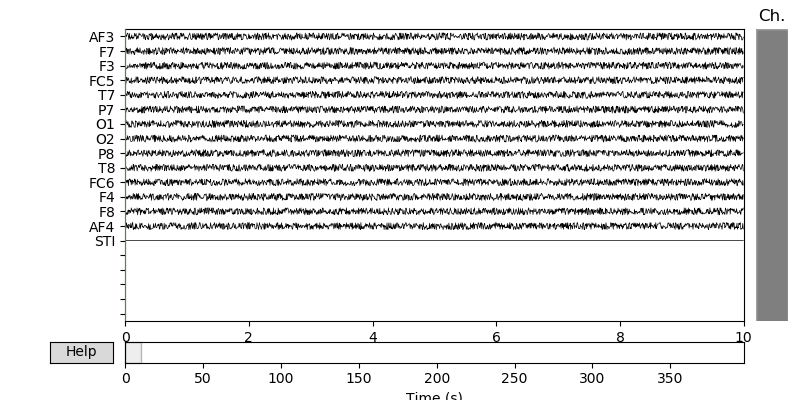

In [82]:
f = raw.plot(scalings='auto', show=False)
f.set_size_inches(8,4)

In [83]:
### Re-reference your data
raw.set_eeg_reference()

Applying average reference.
Applying a custom EEG reference.


<RawArray  |  None, n_channels x n_times : 15 x 50824 (397.1 sec), ~5.9 MB, data loaded>

### Epoching data

In [84]:
## evs should return the same 'events' array you used to create the channel ( I did it just to confirm that all the events are there)


# With the option output='onset' we find only 26 events NB EVENTS ARE VERY CLOSE (JUST 1 TIMESTAMP BETWEEN TWO EVENTS)
# If you set it to 'step' you will have back all the 52 events (but it does not make sense for epoching your data)



evs = mne.find_events(raw, stim_channel='STI', output='onset', shortest_event=1,
                         min_duration=1/raw.info['sfreq'])
print('Number of events found: %d' % len(evs))

100 events found
Event IDs: [1 2 3 4 5]
Number of events found: 100


In [85]:
# Pick the channels you want to include 
reject = dict(eeg=150e-6) # you can set a rejection threshold for bad data (NB in this case all data will be discarded)

baseline = (None,None)
picks = mne.pick_types(raw.info, meg=False, eeg=True, ecg=False, eog=False, stim=False, exclude=[])


# Define the beginning and the end of each epoch
tmin = -1.
tmax = 2.5

# Epoch the data around event 1 (here defined as "trial_start")
epochs =  mne.Epochs(raw, evs, tmin=tmin, tmax=tmax, 
                     baseline=baseline, preload=True, reject=None)

# Check if all the epochs (nr of trials in the experiment) were extracted
print('Number of epochs: %d' % len(epochs))

100 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 100 events and 449 original time points ...
0 bad epochs dropped
Number of epochs: 100


In [86]:
epochs.events

array([[ 9996,     0,     1],
       [10550,     0,     3],
       [10917,     0,     1],
       [11593,     0,     5],
       [11869,     0,     1],
       [12589,     0,     3],
       [12804,     0,     2],
       [13535,     0,     5],
       [13769,     0,     2],
       [14495,     0,     5],
       [14677,     0,     1],
       [15405,     0,     5],
       [15604,     0,     1],
       [16340,     0,     5],
       [16540,     0,     1],
       [17263,     0,     5],
       [17466,     0,     1],
       [18188,     0,     5],
       [18370,     0,     1],
       [19091,     0,     3],
       [19273,     0,     1],
       [19995,     0,     5],
       [20202,     0,     1],
       [20900,     0,     3],
       [21119,     0,     1],
       [21838,     0,     3],
       [22052,     0,     1],
       [22774,     0,     3],
       [23005,     0,     1],
       [23716,     0,     5],
       [23915,     0,     1],
       [24615,     0,     3],
       [24785,     0,     2],
       [25

### QUICK START

Run the code below three times, changing the current_xdf value for the 3 xdf files.

In [107]:
yoshe_xdf = "yoshe_test.xdf"
annach_xdf = "annachess_test.xdf"
annag_xdf = "annag_test.xdf"

current_xdf = yoshe_xdf

streams = xdf.load_xdf(current_xdf)

# Extract streams
unitystr_time_series     = streams[0][0]['time_series']
unitystr_time_stamps     = streams[0][0]['time_stamps']
unitystr_first_timestamp = np.float(unitystr_time_stamps[0])#np.float(streams[0][0]['footer']['info']['first_timestamp'][2])

openvibemarkers_time_series     = streams[0][1]['time_series']
openvibemarkers_time_stamps     = streams[0][1]['time_stamps']
openvibemarkers_first_timestamp = np.float(streams[0][1]['footer']['info']['first_timestamp'][0])

eeg_time_series     = streams[0][2]['time_series']
eeg_time_stamps     = streams[0][2]['time_stamps']
eeg_first_timestamp = np.float(streams[0][2]['footer']['info']['first_timestamp'][0])

# Sampling frequency of the recorded eeg data
sfreq = np.float(streams[0][2]['info']['nominal_srate'][0])

#Convert labels to codes: 1-chose high, 2-chose low, 3- Reward high, 4-reward low, 5-no reward

for i in range (len(unitystr_time_series)):
    if "PressedHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=1
    elif "PressedLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=2
    elif "RewardHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=3
    elif "RewardLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=4
    elif "RewardNone" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=5

#Code to cleanup and trim the mismatching unity timestamps

for i in range (len(unitystr_time_stamps)):
    if unitystr_time_stamps[i] < eeg_time_stamps[0]:
        unitystr_time_stamps[i] = 0
        unitystr_time_series[i] = 0
    if unitystr_time_stamps[i] > eeg_time_stamps[-1]:
        unitystr_time_stamps[i] = 0
        unitystr_time_series[i] = 0

C_unitystr_time_stamps = np.trim_zeros(unitystr_time_stamps)
C_unitystr_time_series = np.trim_zeros(unitystr_time_series)

# 14 channels: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4

ch_names = ('AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4')

# Create the info file
info = mne.create_info(ch_names, sfreq, ch_types='eeg' )

# Convert first time to sample
first_samp = int(eeg_first_timestamp*sfreq)

# NB set the first sample to be able to align the events
raw = mne.io.RawArray(eeg_time_series.T, info, first_samp=first_samp)

montage = mne.channels.read_montage('standard_1020')

raw.set_montage(montage)

# Create a ne stimulation channels
info         = mne.create_info(['STI'], raw.info['sfreq'], ch_types=['stim'])
# Fill it with an vector of zeros
stim_data    = np.zeros((1, len(raw.times)))

stim_raw     = mne.io.RawArray(stim_data, info, first_samp=first_samp)

# Add the new channel to your dataset
raw.add_channels([stim_raw], force_update_info=False)

(C_unitystr_time_stamps*sfreq).astype('int')

# You need to build an array of events
events = np.array(((C_unitystr_time_stamps*sfreq).astype('int'), np.zeros((len(C_unitystr_time_series),)), np.squeeze([C_unitystr_time_series])))

# Add the openvibe events
raw.add_events(events.T, stim_channel='STI')

### Re-reference your data
raw.set_eeg_reference()

## evs should return the same 'events' array you used to create the channel ( I did it just to confirm that all the events are there)


# With the option output='onset' we find only 26 events NB EVENTS ARE VERY CLOSE (JUST 1 TIMESTAMP BETWEEN TWO EVENTS)
# If you set it to 'step' you will have back all the 52 events (but it does not make sense for epoching your data)



evs = mne.find_events(raw, stim_channel='STI', output='onset', shortest_event=1,
                         min_duration=1/raw.info['sfreq'])
print('Number of events found: %d' % len(evs))

# Pick the channels you want to include 
reject = dict(eeg=150e-6) # you can set a rejection threshold for bad data (NB in this case all data will be discarded)

baseline = (None,None)
picks = mne.pick_types(raw.info, meg=False, eeg=True, ecg=False, eog=False, stim=False, exclude=[])


# Define the beginning and the end of each epoch
tmin = -1.
tmax = 1

# Epoch the data around event 1 (here defined as "trial_start")
epochs =  mne.Epochs(raw, evs, tmin=tmin, tmax=tmax, 
                     baseline=baseline, preload=True, reject=None)

# Check if all the epochs (nr of trials in the experiment) were extracted
print('Number of epochs: %d' % len(epochs))

if current_xdf == yoshe_xdf:
    epochs_yoshe = epochs
if current_xdf == annach_xdf:
    epochs_annach = epochs
if current_xdf == annag_xdf:
    epochs_annag = epochs

print("")    
print("----------------")    
print(epochs_yoshe)
print("----------------")
print(epochs_annach)
print("----------------")
print(epochs_annag)

Creating RawArray with float64 data, n_channels=14, n_times=57256
    Range : 19664 ... 76919 =    153.625 ...   600.930 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=57256
    Range : 19664 ... 76919 =    153.625 ...   600.930 secs
Ready.
Applying average reference.
Applying a custom EEG reference.
77 events found
Event IDs: [1 2 3 5]
Number of events found: 77
77 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 77 events and 257 original time points ...
0 bad epochs dropped
Number of epochs: 77

----------------
<Epochs  |   77 events (all good), -1 - 1 sec, baseline [None, None], ~2.3 MB, data loaded,
 '1': 37
 '2': 2
 '3': 22
 '5': 16>
----------------
<Epochs  |   96 events (all good), -1 - 1 sec, baseline [None, None], ~2.9 MB, data loaded,
 '1': 29
 '2': 19
 '3': 12
 '4': 11
 '5': 25>
----------------
<Epochs  |   100 events (all good), -1 - 1 sec, baseline [None, None], ~3

In [171]:
epochs_all = mne.concatenate_epochs([epochs_yoshe, epochs_annach, epochs_annag])

print(epochs_all)

273 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
<Epochs  |   273 events (all good), -1 - 1 sec, baseline [None, None], ~8.1 MB, data loaded,
 '1': 103
 '2': 34
 '3': 51
 '4': 17
 '5': 68>


mne extract power; take windows of 100ms and average the values of these (windowlength and overlapping of the time windows is up to us)or 500ms and moving of 200, etc normally overlapping is 80%. it will be a vector of all the freq values of this timeframe and those can be fed to the network. he suggests recurrent network. make it parametric so we can modify variables. important to put labels

In [172]:
from mne import Epochs, pick_types, find_events
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_validate

this_epoch = epochs_all

epochs_train = this_epoch.copy()
labels = this_epoch.events[:, -1]


# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = this_epoch.get_data()
epochs_data_train = epochs_train.get_data()


#cv = ShuffleSplit(10, test_size=0.2, random_state=42)
#cv_split = cv.split(epochs_data_train)
# Generate 10 folds for cross-validation using 20% of data as test set
cv = ShuffleSplit(10, test_size=.2, random_state=42)
cv_split = cv.split(epochs_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
csp = CSP(n_components=4, reg='ledoit_wolf', log=None, cov_est='epoch', norm_trace=False)

#for i in epochs_data_train:
    #print(i.shape)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

layout = read_layout('EEG1005')
csp.plot_patterns(this_epoch.info, layout=layout, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  res = transformer.fit_transform(X, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:581: Deprecati

Classification accuracy: 0.292727 / Chance level: 0.875458
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs_data, labels)
<ipython-input-172-043efeefa600>:48: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  csp.fit_transform(epochs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


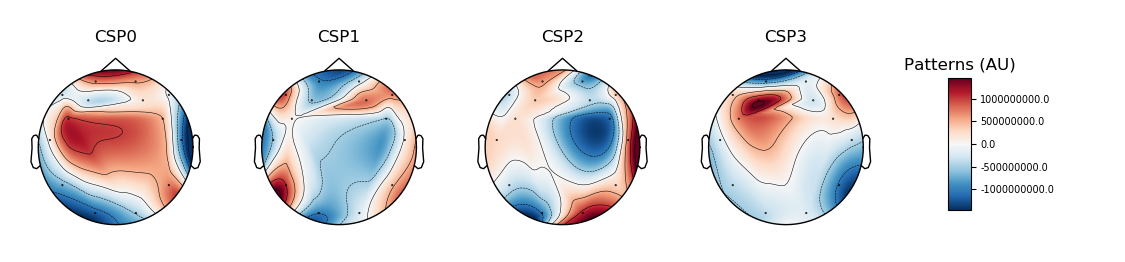

Classification accuracy: 0.292727 / Chance level: 0.875458


In [173]:
layout = read_layout('EEG1005')
csp.plot_patterns(this_epoch.info, layout=layout, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)

print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF

<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f


Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.


<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "full" in 0.17 but will change to None in 0.18, set it explicitly to avoid this warning
  X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
<ipython-input-174-8349595b3fe3>:11: DeprecationWarning: rank defaults to "f

<IPython.core.display.Javascript object>


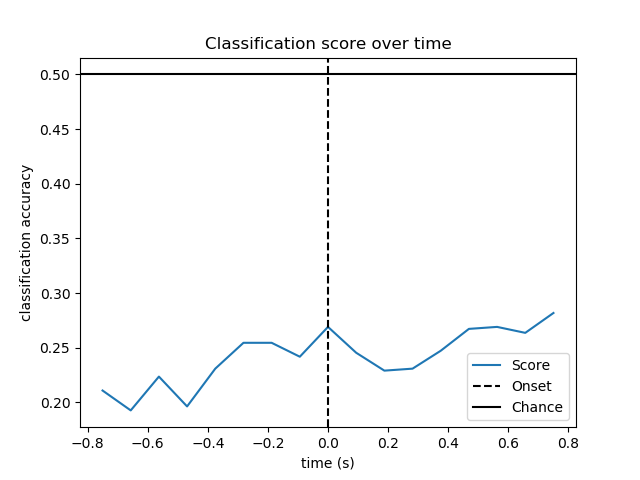

In [174]:
sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + this_epoch.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()